# Project 6 OpenClassroom

In [1]:
## To display the graphs within the code and not in another windows 
import sys
print("Python Version :"+str(sys.version_info))
%matplotlib inline
# To be able to use CSV
import csv
print("CSV Version :"+csv.__version__)
# To be able to use Numpy
import numpy as np
print("Numpy Version :"+np.__version__)
# To be able to use Pandas
import pandas as pd
print("Pandas Version :"+pd.__version__)
# To be able to use Maplotlib
import matplotlib.pyplot as plt

# To be able to use Seaborn
import seaborn as sns
print("Seaborn Version :"+sns.__version__)

# To be able to use Warning
import warnings

import string
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.manifold import TSNE
from sklearn import metrics
from sklearn.cluster import KMeans

Python Version :sys.version_info(major=3, minor=7, micro=6, releaselevel='final', serial=0)
CSV Version :1.0
Numpy Version :1.18.1
Pandas Version :1.0.1
Seaborn Version :0.10.0


### Init of the main variables

In [2]:
# Disable the warnings "ignore"
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)
# Load Pep8 checker
%load_ext pycodestyle_magic
%pycodestyle_on

### Reading of the file

In [3]:
input_df = pd.read_csv('./DataSet.csv', sep=",", header=0)

In [4]:
input_df

uniq_id            crawl_timestamp  \
0     55b85ea15a1536d46b7190ad6fff8ce7  2016-04-30 03:22:56 +0000   
1     7b72c92c2f6c40268628ec5f14c6d590  2016-04-30 03:22:56 +0000   
2     64d5d4a258243731dc7bbb1eef49ad74  2016-04-30 03:22:56 +0000   
3     d4684dcdc759dd9cdf41504698d737d8  2016-06-20 08:49:52 +0000   
4     6325b6870c54cd47be6ebfbffa620ec7  2016-06-20 08:49:52 +0000   
...                                ...                        ...   
1045  958f54f4c46b53c8a0a9b8167d9140bc  2015-12-01 10:15:43 +0000   
1046  fd6cbcc22efb6b761bd564c28928483c  2015-12-01 10:15:43 +0000   
1047  5912e037d12774bb73a2048f35a00009  2015-12-01 10:15:43 +0000   
1048  c3edc504d1b4f0ba6224fa53a43a7ad6  2015-12-01 10:15:43 +0000   
1049  f2f027ad6a6df617c9f125173da71e44  2015-12-01 10:15:43 +0000   

                                            product_url  \
0     http://www.flipkart.com/elegance-polyester-mul...   
1     http://www.flipkart.com/sathiyas-cotton-bath-t...   
2     http://www.flipkart.com/eurospa-cotton-terry-f...   
3     http://www.flipkart.com/santosh-royal-fashion-...   
4     http://www.flipkart.com/jaipur-print-cotton-fl...   
...                                                 ...   
1045  http://www.flipkart.com/oren-empower-extra-lar...   
1046  http://www.flipkart.com/wallmantra-large-vinyl...   
1047  http://www.flipkart.com/uberlyfe-extra-large-p...   
1048  http://www.flipkart.com/wallmantra-medium-viny...   
1049  http://www.flipkart.com/uberlyfe-large-vinyl-s...   

                                           product_name  \
0     Elegance Polyester Multicolor Abstract Eyelet ...   
1                            Sathiyas Cotton Bath Towel   
2                   Eurospa Cotton Terry Face Towel Set   
3     Santosh Royal Fashion Cotton Printed King Size...   
4     Jaipur Print Cotton Floral King Sized Double B...   
...                                                 ...   
1045     Oren Empower Extra Large Self Adhesive Sticker   
1046             Wallmantra Large Vinyl Sticker Sticker   
1047  Uberlyfe Extra Large Pigmented Polyvinyl Films...   
1048            Wallmantra Medium Vinyl Sticker Sticker   
1049                       Uberlyfe Large Vinyl Sticker   

                                  product_category_tree               pid  \
0     ["Home Furnishing >> Curtains & Accessories >>...  CRNEG7BKMFFYHQ8Z   
1     ["Baby Care >> Baby Bath & Skin >> Baby Bath T...  BTWEGFZHGBXPHZUH   
2     ["Baby Care >> Baby Bath & Skin >> Baby Bath T...  BTWEG6SHXTDB2A2Y   
3     ["Home Furnishing >> Bed Linen >> Bedsheets >>...  BDSEJT9UQWHDUBH4   
4     ["Home Furnishing >> Bed Linen >> Bedsheets >>...  BDSEJTHNGWVGWWQU   
...                                                 ...               ...   
1045  ["Baby Care >> Baby & Kids Gifts >> Stickers >...  STIE88ZGTX65GH4V   
1046  ["Baby Care >> Baby & Kids Gifts >> Stickers >...  STIEC889ZD5GDCVQ   
1047  ["Baby Care >> Baby & Kids Gifts >> Stickers >...  STIE5UVGW2JWVWCT   
1048  ["Baby Care >> Baby & Kids Gifts >> Stickers >...  STIEC889ZGFD3RCE   
1049  ["Baby Care >> Baby & Kids Gifts >> Stickers >...  STIE2ZEPACRQJKH7   

      retail_price  discounted_price                                 image  \
0           1899.0             899.0  55b85ea15a1536d46b7190ad6fff8ce7.jpg   
1            600.0             449.0  7b72c92c2f6c40268628ec5f14c6d590.jpg   
2              NaN               NaN  64d5d4a258243731dc7bbb1eef49ad74.jpg   
3           2699.0            1299.0  d4684dcdc759dd9cdf41504698d737d8.jpg   
4           2599.0             698.0  6325b6870c54cd47be6ebfbffa620ec7.jpg   
...            ...               ...                                   ...   
1045        1399.0             999.0  958f54f4c46b53c8a0a9b8167d9140bc.jpg   
1046        4930.0            1896.0  fd6cbcc22efb6b761bd564c28928483c.jpg   
1047        4500.0            1449.0  5912e037d12774bb73a2048f35a00009.jpg   
1048        3465.0            1333.0  c3edc504d1b4f0ba6224fa53a43a7ad6.jpg   
1

In [5]:
input_df['clean_concat']

0       elegance brand elegance designed door type eye...
1       sathiyas machine washable material cotton desi...
2       eurospa material cotton terry design shuvam br...
3       santosh royal fashion brand santosh royal fash...
4       jaipur print machine washable brand jaipur pri...
                              ...                        
1045    oren empower number content sale package pack ...
1046    wallmantra number content sale package pack sa...
1047    uberlyfe number content sale package pack sale...
1048    wallmantra number content sale package pack sa...
1049    uberlyfe sale package sticker brand uberlyfe t...
Name: clean_concat, Length: 1050, dtype: object

### Bag of words

In [6]:
snowball_stemmer = SnowballStemmer('english')


def stemming_tokenizer(str_input):
    words = re.sub(r"[^a-z-]", " ", str_input).lower().split()
    words = [snowball_stemmer.stem(word) for word in words]
    return words

In [7]:
count_vectorizer = CountVectorizer(stop_words='english', tokenizer=stemming_tokenizer)

In [8]:
X_bagofwords = count_vectorizer.fit_transform(input_df['clean_concat'])

In [9]:
X_bagofwords.toarray().shape

(1050, 4701)

In [10]:
bagofwords_df = pd.DataFrame(X_bagofwords.toarray(), columns=count_vectorizer.get_feature_names())

In [11]:
bagofwords_df

aapno  aari  aarika  abgn  abil  abklgrngrngrn  abklplplpnk  \
0         0     0       0     0     0              0            0   
1         0     0       0     0     0              0            0   
2         0     0       0     0     0              0            0   
3         0     0       0     0     0              0            0   
4         0     0       0     0     0              0            0   
...     ...   ...     ...   ...   ...            ...          ...   
1045      0     0       0     0     0              0            0   
1046      0     0       0     0     0              0            0   
1047      0     0       0     0     0              0            0   
1048      0     0       0     0     0              0            0   
1049      0     0       0     0     0              0            0   

      abklplpnkpnk  abl  abod  abras  abroad  absolut  absorb  abstract  \
0                0    0     0      0       0        0       0         5   
1                0    0     0      0       0        0       0         0   
2                0    0     0      0       0        0       1         0   
3                0    0     0      0       0        0       0         0   
4                0    0     0      0       0        0       0         0   
...            ...  ...   ...    ...     ...      ...     ...       ...   
1045             0    0     0      0       0        0       0         0   
1046             0    0     0      0       0        0       0         0   
1047             0    0     0      0       0        0       0         0   
1048             0    0     0      0       0        0       0         0   
1049             0    0     0      0       0        0       0         0   

      abstrct  accent  accept  access  accessori  accid  accident  accommod  \
0           0       0       0       0          0      0         0         0   
1           0       0       0       0          0      0         0         0   
2           0       0       0       0          0      0         0         0   
3           0       0       0       0          0      0         0         0   
4           0       0       0       0          0      0         0         0   
...       ...     ...     ...     ...        ...    ...       ...       ...   
1045        0       0       0       0          0      0         0         0   
1046        0       0       0       0          0      0         0         0   
1047        0       0       0       0          0      0         0         0   
1048        0       0       0       0          0      0         0         0   
1049        0       0       0       0          0      0         0         0   

      accomplish  accord  accredit  accur  acer  ach  acid  acn  acryl  \
0              0       0         0      0     0    0     0    0      0   
1              0       0         0      0     0    0     0    0      0   
2              0       0         0      0     0    0     0    0      0   
3              0       0         0      0     0    0     0    0      0   
4              0       0         0      0     0    0     0    0      0   
...          ...     ...       ...    ...   ...  ...   ...  ...    ...   
1045           0       0         0      0     0    0     1    0      0   
1046           0       0         0      0     0    0     0    0      0   
1047           0       0         0      0     0    0     0    0      0   
1048           0       0         0      0     0    0     0    0      0   
1049           0       0         0      0     0    0     0    0      0   

      action  activ  actual  ad  adaa  adapt  adaptor  addict  addit  address  \
0          0      0       0   0     0      0        0       0      0        0   
1          0      0       0   0     0      0        0       0      0        0   
2          0      0       0   0     0      0        0       0      0        0   
3          0      0       0   0     0      0        0       0      0        0   
4          0      0       0   0  

### TF-IDF

In [12]:
tfidf_vectorizer = TfidfVectorizer(stop_words='english', tokenizer=stemming_tokenizer, use_idf=False, norm='l1')
X_tfidf = tfidf_vectorizer.fit_transform(input_df['clean_concat'])
tfidf_df = pd.DataFrame(X_tfidf.toarray(), columns=tfidf_vectorizer.get_feature_names())

In [13]:
tfidf_df

aapno  aari  aarika  abgn  abil  abklgrngrngrn  abklplplpnk  \
0       0.0   0.0     0.0   0.0   0.0            0.0          0.0   
1       0.0   0.0     0.0   0.0   0.0            0.0          0.0   
2       0.0   0.0     0.0   0.0   0.0            0.0          0.0   
3       0.0   0.0     0.0   0.0   0.0            0.0          0.0   
4       0.0   0.0     0.0   0.0   0.0            0.0          0.0   
...     ...   ...     ...   ...   ...            ...          ...   
1045    0.0   0.0     0.0   0.0   0.0            0.0          0.0   
1046    0.0   0.0     0.0   0.0   0.0            0.0          0.0   
1047    0.0   0.0     0.0   0.0   0.0            0.0          0.0   
1048    0.0   0.0     0.0   0.0   0.0            0.0          0.0   
1049    0.0   0.0     0.0   0.0   0.0            0.0          0.0   

      abklplpnkpnk  abl  abod  abras  abroad  absolut    absorb  abstract  \
0              0.0  0.0   0.0    0.0     0.0      0.0  0.000000  0.031646   
1              0.0  0.0   0.0    0.0     0.0      0.0  0.000000  0.000000   
2              0.0  0.0   0.0    0.0     0.0      0.0  0.006135  0.000000   
3              0.0  0.0   0.0    0.0     0.0      0.0  0.000000  0.000000   
4              0.0  0.0   0.0    0.0     0.0      0.0  0.000000  0.000000   
...            ...  ...   ...    ...     ...      ...       ...       ...   
1045           0.0  0.0   0.0    0.0     0.0      0.0  0.000000  0.000000   
1046           0.0  0.0   0.0    0.0     0.0      0.0  0.000000  0.000000   
1047           0.0  0.0   0.0    0.0     0.0      0.0  0.000000  0.000000   
1048           0.0  0.0   0.0    0.0     0.0      0.0  0.000000  0.000000   
1049           0.0  0.0   0.0    0.0     0.0      0.0  0.000000  0.000000   

      abstrct  accent  accept  access  accessori  accid  accident  accommod  \
0         0.0     0.0     0.0     0.0        0.0    0.0       0.0       0.0   
1         0.0     0.0     0.0     0.0        0.0    0.0       0.0       0.0   
2         0.0     0.0     0.0     0.0        0.0    0.0       0.0       0.0   
3         0.0     0.0     0.0     0.0        0.0    0.0       0.0       0.0   
4         0.0     0.0     0.0     0.0        0.0    0.0       0.0       0.0   
...       ...     ...     ...     ...        ...    ...       ...       ...   
1045      0.0     0.0     0.0     0.0        0.0    0.0       0.0       0.0   
1046      0.0     0.0     0.0     0.0        0.0    0.0       0.0       0.0   
1047      0.0     0.0     0.0     0.0        0.0    0.0       0.0       0.0   
1048      0.0     0.0     0.0     0.0        0.0    0.0       0.0       0.0   
1049      0.0     0.0     0.0     0.0        0.0    0.0       0.0       0.0   

      accomplish  accord  accredit  accur  acer  ach      acid  acn  acryl  \
0            0.0     0.0       0.0    0.0   0.0  0.0  0.000000  0.0    0.0   
1            0.0     0.0       0.0    0.0   0.0  0.0  0.000000  0.0    0.0   
2            0.0     0.0       0.0    0.0   0.0  0.0  0.000000  0.0    0.0   
3            0.0     0.0       0.0    0.0   0.0  0.0  0.000000  0.0    0.0   
4            0.0     0.0       0.0    0.0   0.0  0.0  0.000000  0.0    0.0   
...          ...     ...       ...    ...   ...  ...       ...  ...    ...   
1045         0.0     0.0       0.0    0.0   0.0  0.0  0.003597  0.0    0.0   
1046         0.0     0.0       0.0    0.0   0.0  0.0  0.000000  0.0    0.0   
1047         0.0     0.0       0.0    0.0   0.0  0.0  0.000000  0.0    0.0   
1048         0.0     0.0       0.0    0.0   0.0  0.0  0.000000  0.0    0.0   
1049         0.0     0.0       0.0    0.0   0.0  0.0  0.000000  0.0    0.0   

      action  activ  actual   ad  adaa  adapt  adaptor  addict  addit  \
0        0.0    0.0     0.0  0.0   0.0    0.0      0.0     0.0    0.0   
1        0.0    0.0     0.0  0.0   0.0    0.0      0.0     0.0    0.0   
2        0.0    0.0     0.0  0.0   0.0    0.0      0.0     0.0    0.0   
3        0.0    0.0     0.0  0.0   0.0    0.0      0.0     0.0    0.0   
4

### TSNE 

In [14]:
number_of_categories = input_df['product_main_category'].nunique()

In [15]:
input_df['product_main_category'].unique()

array(['Home Furnishing ', 'Baby Care ', 'Watches ',
       'Home Decor & Festive Needs ', 'Kitchen & Dining ',
       'Beauty and Personal Care ', 'Computers '], dtype=object)

In [16]:
def tsne_analysis(myinput_df, myX, algo):
    myX_embedded = TSNE(n_components=2).fit_transform(myX)
    myX_embedded_df = pd.DataFrame(myX_embedded, columns=[algo+'1', algo+'2'])
    myconcat_df = pd.concat([myinput_df, myX_embedded_df], axis=1, sort=False)
    silhouette_score = metrics.silhouette_score(myX_embedded, myconcat_df['product_main_category'])
    calinski_harabasz_score = metrics.calinski_harabasz_score(myX_embedded, myconcat_df['product_main_category'])
    print('silhouette_score '+str(silhouette_score))
    print('calinski_harabasz_score '+str(calinski_harabasz_score))
    clusterer = KMeans(n_clusters=number_of_categories, random_state=42)
    cluster_labels = clusterer.fit_predict(myX_embedded_df)
    myKmeans_df = pd.DataFrame(cluster_labels, columns=['kmeans'+algo])
    kmeans_df = pd.concat([myX_embedded_df, myKmeans_df], axis=1, sort=False)
    sns.set(palette='muted', color_codes=True, style='darkgrid')
    fig, axs = plt.subplots(1, 2, figsize=(20, 8))
    sns.despine(left=True)
    sns.scatterplot(x=algo+'1', y=algo+'2', ax=axs[0], hue="product_main_category", data=myconcat_df)
    sns.scatterplot(x=algo+'1', y=algo+'2', ax=axs[1], hue="kmeans"+algo, data=kmeans_df, legend="full")
    axs[0].set_title('TSNE on two dimensions for '+algo, fontsize=20)
    axs[0].set_xlabel(algo+'1', fontsize=15)
    axs[0].set_ylabel(algo+'2', fontsize=15)
    axs[0].tick_params(labelsize=12)
    axs[1].set_title('KMEANS on two dimensions for '+algo, fontsize=20)
    axs[1].set_xlabel(algo+'1', fontsize=15)
    axs[1].set_ylabel(algo+'2', fontsize=15)
    axs[1].tick_params(labelsize=12)
    fig.savefig(algo+'.png')
    return myconcat_df, silhouette_score, calinski_harabasz_score

silhouette_score 0.2747385
calinski_harabasz_score 671.758499071198


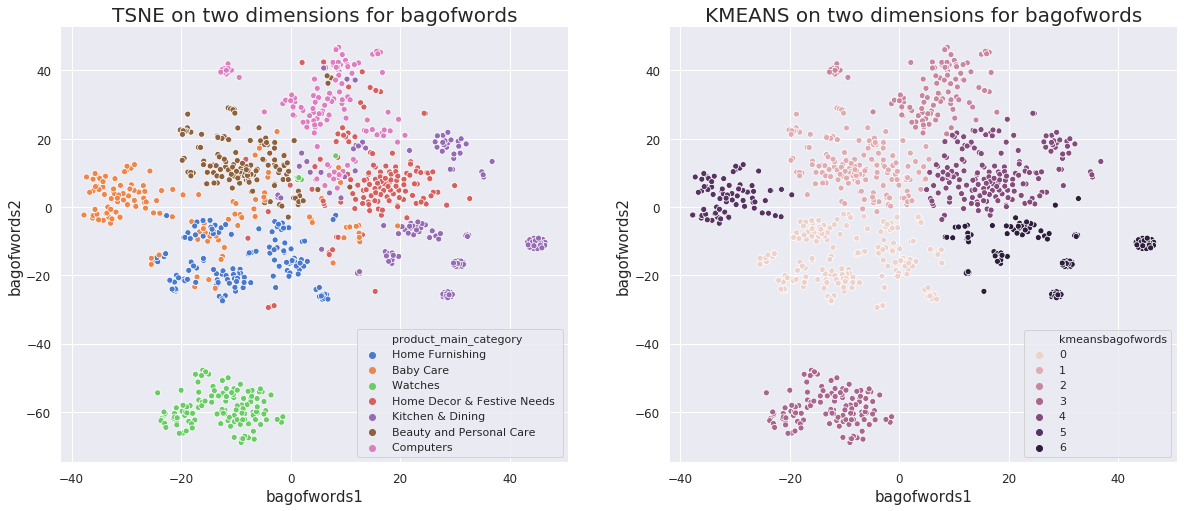

In [17]:
updatedbagofwords_df, silhouette_bagofwords, calinski_bagofwords = tsne_analysis(input_df, X_bagofwords, 'bagofwords')

In [18]:
updatedbagofwords_df

uniq_id            crawl_timestamp  \
0     55b85ea15a1536d46b7190ad6fff8ce7  2016-04-30 03:22:56 +0000   
1     7b72c92c2f6c40268628ec5f14c6d590  2016-04-30 03:22:56 +0000   
2     64d5d4a258243731dc7bbb1eef49ad74  2016-04-30 03:22:56 +0000   
3     d4684dcdc759dd9cdf41504698d737d8  2016-06-20 08:49:52 +0000   
4     6325b6870c54cd47be6ebfbffa620ec7  2016-06-20 08:49:52 +0000   
...                                ...                        ...   
1045  958f54f4c46b53c8a0a9b8167d9140bc  2015-12-01 10:15:43 +0000   
1046  fd6cbcc22efb6b761bd564c28928483c  2015-12-01 10:15:43 +0000   
1047  5912e037d12774bb73a2048f35a00009  2015-12-01 10:15:43 +0000   
1048  c3edc504d1b4f0ba6224fa53a43a7ad6  2015-12-01 10:15:43 +0000   
1049  f2f027ad6a6df617c9f125173da71e44  2015-12-01 10:15:43 +0000   

                                            product_url  \
0     http://www.flipkart.com/elegance-polyester-mul...   
1     http://www.flipkart.com/sathiyas-cotton-bath-t...   
2     http://www.flipkart.com/eurospa-cotton-terry-f...   
3     http://www.flipkart.com/santosh-royal-fashion-...   
4     http://www.flipkart.com/jaipur-print-cotton-fl...   
...                                                 ...   
1045  http://www.flipkart.com/oren-empower-extra-lar...   
1046  http://www.flipkart.com/wallmantra-large-vinyl...   
1047  http://www.flipkart.com/uberlyfe-extra-large-p...   
1048  http://www.flipkart.com/wallmantra-medium-viny...   
1049  http://www.flipkart.com/uberlyfe-large-vinyl-s...   

                                           product_name  \
0     Elegance Polyester Multicolor Abstract Eyelet ...   
1                            Sathiyas Cotton Bath Towel   
2                   Eurospa Cotton Terry Face Towel Set   
3     Santosh Royal Fashion Cotton Printed King Size...   
4     Jaipur Print Cotton Floral King Sized Double B...   
...                                                 ...   
1045     Oren Empower Extra Large Self Adhesive Sticker   
1046             Wallmantra Large Vinyl Sticker Sticker   
1047  Uberlyfe Extra Large Pigmented Polyvinyl Films...   
1048            Wallmantra Medium Vinyl Sticker Sticker   
1049                       Uberlyfe Large Vinyl Sticker   

                                  product_category_tree               pid  \
0     ["Home Furnishing >> Curtains & Accessories >>...  CRNEG7BKMFFYHQ8Z   
1     ["Baby Care >> Baby Bath & Skin >> Baby Bath T...  BTWEGFZHGBXPHZUH   
2     ["Baby Care >> Baby Bath & Skin >> Baby Bath T...  BTWEG6SHXTDB2A2Y   
3     ["Home Furnishing >> Bed Linen >> Bedsheets >>...  BDSEJT9UQWHDUBH4   
4     ["Home Furnishing >> Bed Linen >> Bedsheets >>...  BDSEJTHNGWVGWWQU   
...                                                 ...               ...   
1045  ["Baby Care >> Baby & Kids Gifts >> Stickers >...  STIE88ZGTX65GH4V   
1046  ["Baby Care >> Baby & Kids Gifts >> Stickers >...  STIEC889ZD5GDCVQ   
1047  ["Baby Care >> Baby & Kids Gifts >> Stickers >...  STIE5UVGW2JWVWCT   
1048  ["Baby Care >> Baby & Kids Gifts >> Stickers >...  STIEC889ZGFD3RCE   
1049  ["Baby Care >> Baby & Kids Gifts >> Stickers >...  STIE2ZEPACRQJKH7   

      retail_price  discounted_price                                 image  \
0           1899.0             899.0  55b85ea15a1536d46b7190ad6fff8ce7.jpg   
1            600.0             449.0  7b72c92c2f6c40268628ec5f14c6d590.jpg   
2              NaN               NaN  64d5d4a258243731dc7bbb1eef49ad74.jpg   
3           2699.0            1299.0  d4684dcdc759dd9cdf41504698d737d8.jpg   
4           2599.0             698.0  6325b6870c54cd47be6ebfbffa620ec7.jpg   
...            ...               ...                                   ...   
1045        1399.0             999.0  958f54f4c46b53c8a0a9b8167d9140bc.jpg   
1046        4930.0            1896.0  fd6cbcc22efb6b761bd564c28928483c.jpg   
1047        4500.0            1449.0  5912e037d12774bb73a2048f35a00009.jpg   
1048        3465.0            1333.0  c3edc504d1b4f0ba6224fa53a43a7ad6.jpg   
1

In [19]:
silhouette_bagofwords

0.2747385

In [20]:
calinski_bagofwords

671.758499071198

silhouette_score 0.24846697
calinski_harabasz_score 514.0654570715894


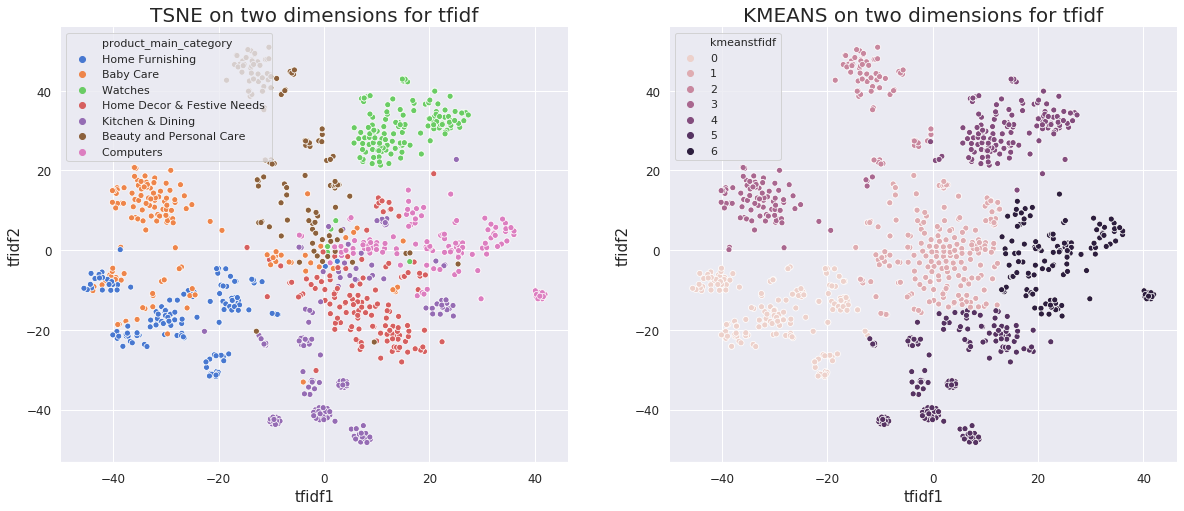

1:50: E221 multiple spaces before operator


In [21]:
updatedtfidf_df, silhouette_tfidf, calinski_tfidf  = tsne_analysis(input_df, X_tfidf, 'tfidf')

In [22]:
silhouette_tfidf

0.24846697

In [23]:
calinski_tfidf

514.0654570715894

### Bert embedding

In [24]:
from sentence_transformers import SentenceTransformer

embedder = SentenceTransformer('bert-base-nli-mean-tokens')

# Corpus with example sentences
corpus = ['A man is eating food.',
          'A man is eating a piece of bread.',
          'A man is eating pasta.',
          'The girl is carrying a baby.',
          'The baby is carried by the woman',
          'A man is riding a horse.',
          'A man is riding a white horse on an enclosed ground.',
          'A monkey is playing drums.',
          'Someone in a gorilla costume is playing a set of drums.',
          'A cheetah is running behind its prey.',
          'A cheetah chases prey on across a field.']

corpus_embeddings = embedder.encode(corpus)

In [25]:
corpus_embeddings

[array([ 1.66185901e-01,  1.24403805e-01,  1.24970782e+00, -5.38381338e-01,
        -3.13073874e-01,  7.52459884e-01, -1.24883115e+00,  6.87136710e-01,
        -6.58801198e-01, -7.94196367e-01, -1.28960341e-01,  8.81196678e-01,
        -2.20511585e-01,  2.43561849e-01,  8.58891785e-01, -3.24881583e-01,
         7.66356587e-02, -9.61474955e-01,  4.37114358e-01, -2.51154184e-01,
        -1.76504955e-01,  1.66995943e-01, -9.16695476e-01, -9.06206965e-01,
        -1.71470687e-01,  2.67859370e-01, -8.09518218e-01,  4.01738912e-01,
         7.96617746e-01,  2.13668570e-01, -1.09779693e-01,  3.62069160e-01,
         4.81450111e-01, -5.60663819e-01, -1.60017240e+00, -7.52470732e-01,
         9.44361329e-01, -3.59771289e-02,  2.05376565e-01,  1.24123740e+00,
         1.22481242e-01,  3.00850093e-01,  1.50590748e-01,  9.87002969e-01,
         6.19929075e-01, -2.87815034e-01,  1.41617084e+00,  9.16837573e-01,
         1.05797425e-02, -1.01104403e+00,  1.31013250e+00, -1.11828208e+00,
        -1.1

In [30]:
X_bertembeddings = embedder.encode(input_df['clean_concat'])

In [ ]:
X_bertembeddings

silhouette_score 0.25909725
calinski_harabasz_score 525.3380042616367


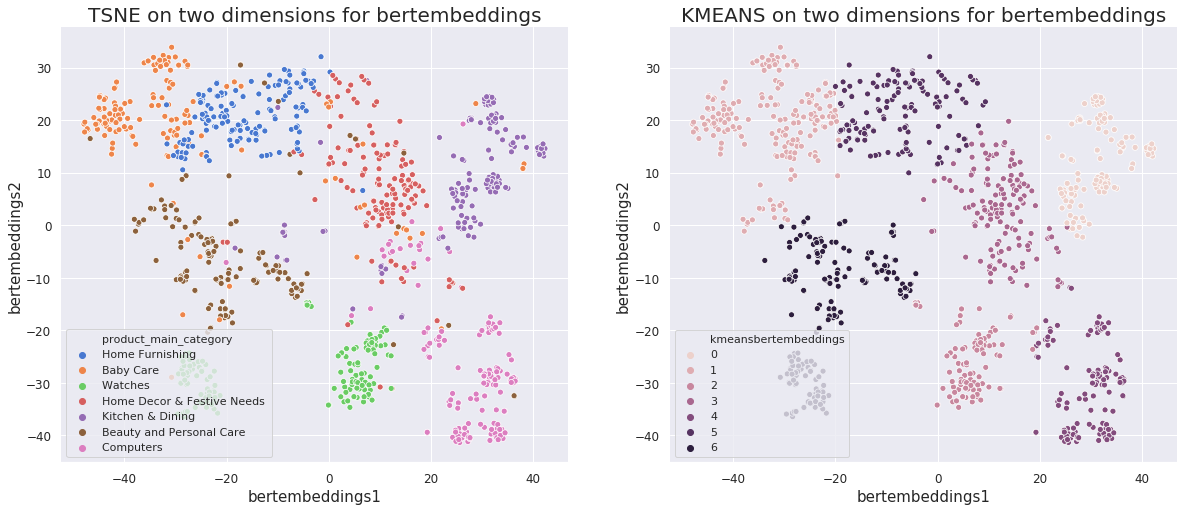

In [31]:
updatedbertembeddings_df, silhouette_bertembeddings, calinski_bertembeddings = tsne_analysis(input_df, X_bertembeddings, 'bertembeddings')

In [ ]:
updatedbirtembeddings_df

In [ ]:
silhouette_birtembeddings

In [ ]:
calinski_birtembeddings